In [2]:
import os
os.chdir("D:/downloads/edwisorproject")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from collections import Counter
from scipy.sparse import hstack
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn import model_selection

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_val_score
from fancyimpute import KNN 


ModuleNotFoundError: No module named 'sklearn.base'

In [4]:
data = pd.read_excel("Absenteeism_at_work_Project.xls")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [7]:
print("Shape of the data is {}" . format(data.shape))

Shape of the data is (740, 21)


In [8]:
print(data.columns)
print("-"*80)
print("Total number of Features is : {}" .format(len(data.columns)))

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')
--------------------------------------------------------------------------------
Total number of Features is : 21


In [9]:
data.columns = data.columns.str.replace(' ', '_')
print(data.columns)

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')


In [10]:
data.nunique()

ID                                 36
Reason_for_absence                 28
Month_of_absence                   13
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Work_load_Average/day_             38
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

In [11]:
data["Absenteeism_time_in_hours"].value_counts()

8.0      199
2.0      155
3.0      110
1.0       88
4.0       60
0.0       36
16.0      19
24.0      16
40.0       7
5.0        7
32.0       5
64.0       3
80.0       3
120.0      3
56.0       2
112.0      2
104.0      1
7.0        1
48.0       1
Name: Absenteeism_time_in_hours, dtype: int64

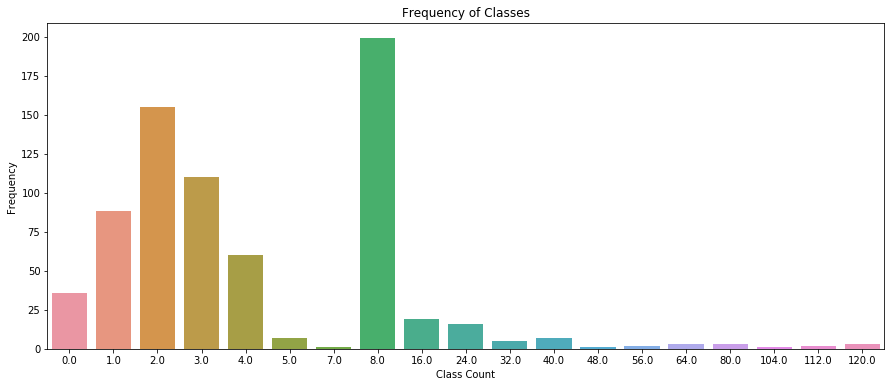

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.mpl.rc("figure", figsize=(15,6))
sns.countplot(x="Absenteeism_time_in_hours", data= data)
dim = (4,6)
plt.ylabel('Frequency')
plt.xlabel('Class Count')
plt.title("Frequency of Classes")
plt.show()

In [13]:
missing_val = pd.DataFrame(data.isnull().sum())
print(missing_val)

                                  0
ID                                0
Reason_for_absence                3
Month_of_absence                  1
Day_of_the_week                   0
Seasons                           0
Transportation_expense            7
Distance_from_Residence_to_Work   3
Service_time                      3
Age                               3
Work_load_Average/day_           10
Hit_target                        6
Disciplinary_failure              6
Education                        10
Son                               6
Social_drinker                    3
Social_smoker                     4
Pet                               2
Weight                            1
Height                           14
Body_mass_index                  31
Absenteeism_time_in_hours        22


In [14]:
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns  = {'index' : 'variables' , 0 : 'missing_percentage' })
missing_val["missing_percentage"] =  (missing_val["missing_percentage"] / len(data))*100
missing_val = missing_val.sort_values('missing_percentage', ascending= False).reset_index(drop = True)

In [15]:
missing_val

,variables,missing_percentage
0,Body_mass_index,4.189189
1,Absenteeism_time_in_hours,2.972973
2,Height,1.891892
3,Work_load_Average/day_,1.351351
4,Education,1.351351
5,Transportation_expense,0.945946
6,Son,0.810811
7,Disciplinary_failure,0.810811
8,Hit_target,0.810811
9,Social_smoker,0.540541


In [16]:
# Droping observation in which "Absenteeism time in hours" has missing value
data = data.drop(data[data['Absenteeism_time_in_hours'].isnull()].index, axis=0)
print(data.shape)
print(data['Absenteeism_time_in_hours'].isnull().sum())

(718, 21)
0


In [17]:
# let's go ahead and have a look at how many observations we would drop
print('Total employes with values in all variables: ', data.dropna().shape[0])
print('Total employes in the company: ', data.shape[0])
print('Percentage of data without missing values: ', data.dropna().shape[0]/ np.float(data.shape[0]))

Total employes with values in all variables:  639
Total employes in the company:  718
Percentage of data without missing values:  0.8899721448467967


In [19]:
## Imputing Missing Values using KNN imputation
data = pd.DataFrame(kNN(k = 3).complete(data), columns = data.columns)

NameError: name 'kNN' is not defined

In [20]:
data.isnull().sum()

ID                                  0
Reason_for_absence                  3
Month_of_absence                    1
Day_of_the_week                     0
Seasons                             0
Transportation_expense              6
Distance_from_Residence_to_Work     3
Service_time                        3
Age                                 2
Work_load_Average/day_              8
Hit_target                          6
Disciplinary_failure                5
Education                          10
Son                                 6
Social_drinker                      3
Social_smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body_mass_index                    29
Absenteeism_time_in_hours           0
dtype: int64

In [21]:
print("Unique values Per Feature")
print("-"*25)
pd.DataFrame(data.nunique()).T

Unique values Per Feature
-------------------------


,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,36,28,13,5,4,24,25,18,22,38,13,2,4,5,2,2,6,26,14,17,19


In [22]:
data.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,718.000000,715.000000,717.000000,718.000000,718.000000,712.000000,715.000000,715.000000,716.000000,710.000000,712.000000,713.000000,708.000000,712.000000,715.000000,714.000000,716.000000,717.000000,704.000000,689.000000,718.000000
mean,17.981894,19.394406,6.264993,3.899721,2.532033,220.403090,29.586014,12.597203,36.474860,271320.535211,94.610955,0.046283,1.300847,1.009831,0.563636,0.071429,0.743017,79.089261,172.119318,26.706821,6.977716
std,11.035935,8.293865,3.439755,1.419519,1.105813,66.126964,14.786220,4.376214,6.477778,38914.458883,3.813374,0.210245,0.682080,1.084951,0.496281,0.257720,1.311976,12.852531,6.053340,4.290806,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,291876.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


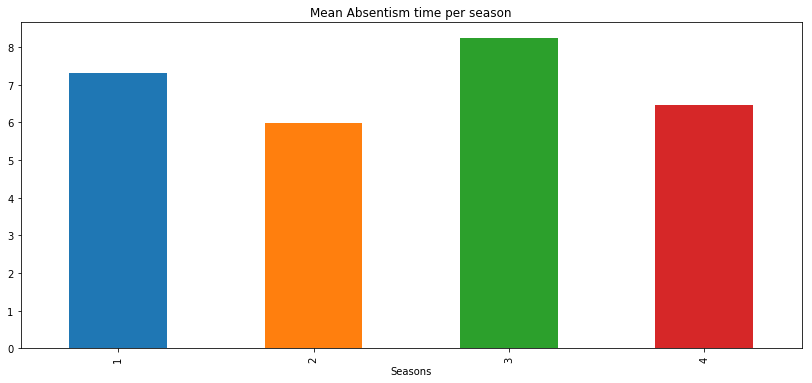

In [23]:
data.groupby('Seasons')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism time per season',figsize=(14,6))
plt.show()

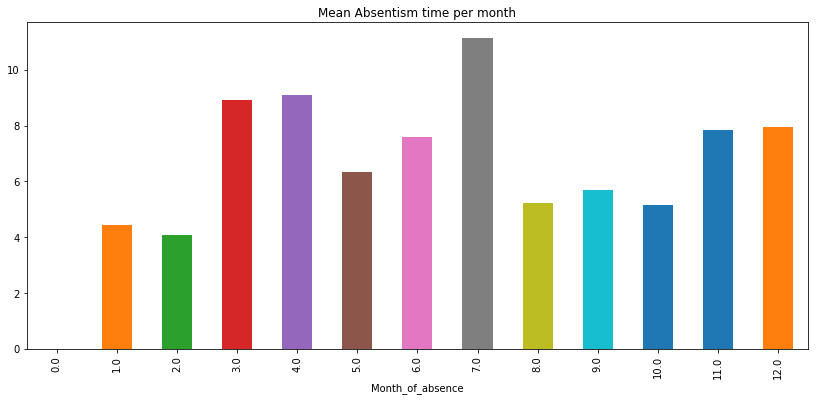

In [24]:
data.groupby('Month_of_absence')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism time per month',figsize=(14,6))
plt.show()

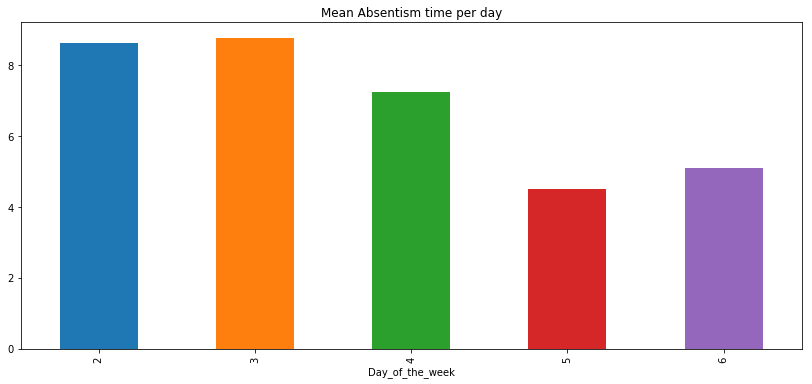

In [26]:
data.groupby('Day_of_the_week')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism time per day',figsize=(14,6))
plt.show()   

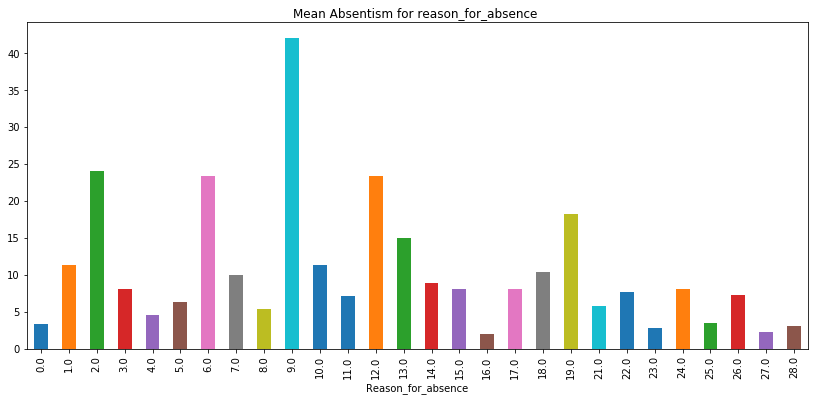

In [27]:
data.groupby('Reason_for_absence')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism for reason_for_absence ',figsize=(14,6))
plt.show()

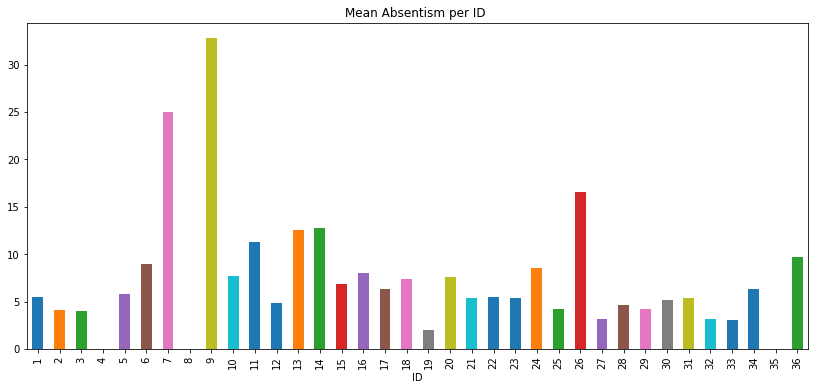

In [28]:
data.groupby('ID')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism per ID ',figsize=(14,6))
plt.show()

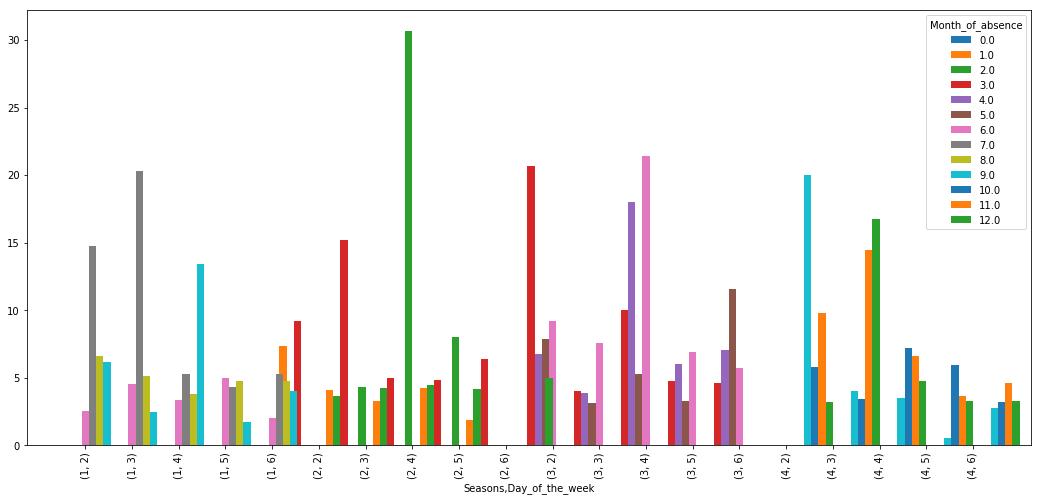

In [29]:
a = data.pivot_table(values = 'Absenteeism_time_in_hours' , index = ['Seasons','Day_of_the_week'], columns = ['Month_of_absence'] )
a.plot(kind ='bar',width = 2, figsize= (18, 8))

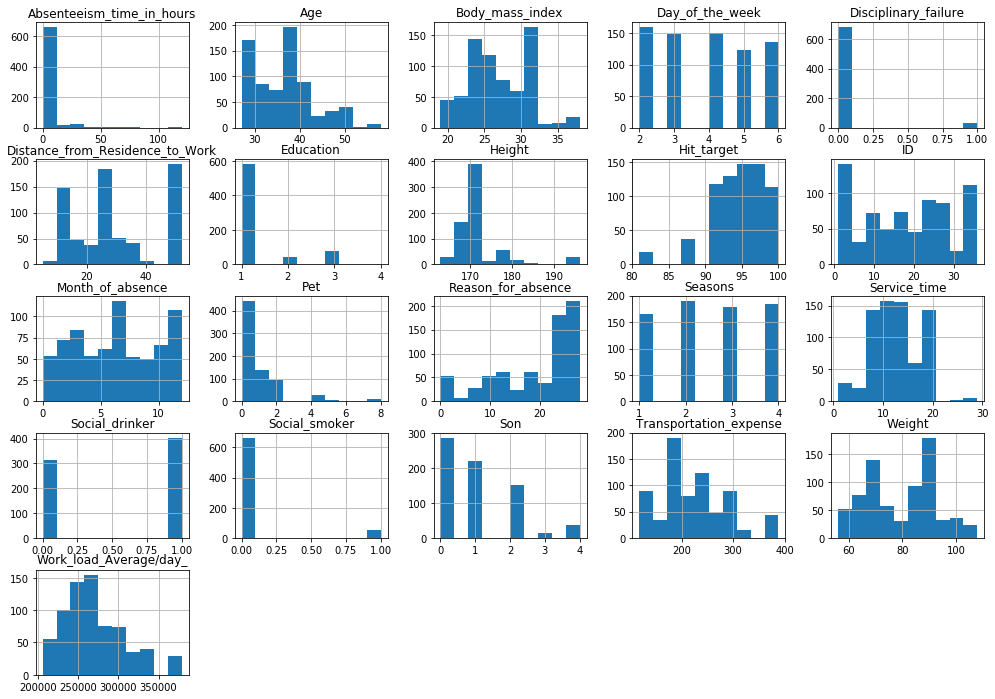

In [30]:
from matplotlib import pyplot
data.hist(figsize=(17,12))
pyplot.show()

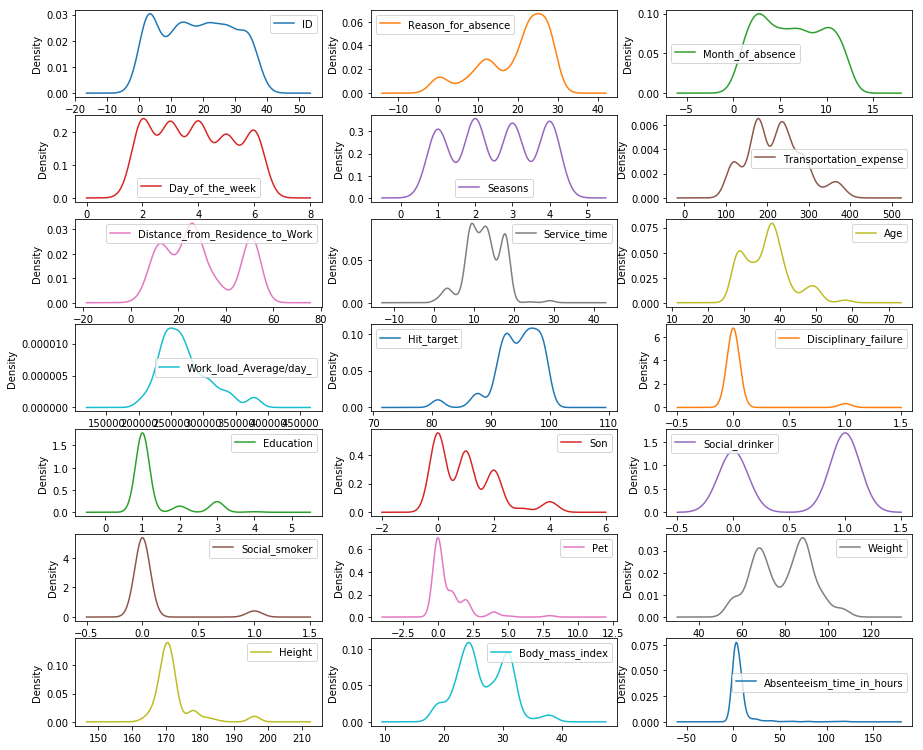

In [31]:
import matplotlib.pyplot as plt
data.plot(kind='density', subplots=True, layout=(8,3), sharex=False) 
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 2,wspace=0.2, hspace=0.2)
pyplot.show()

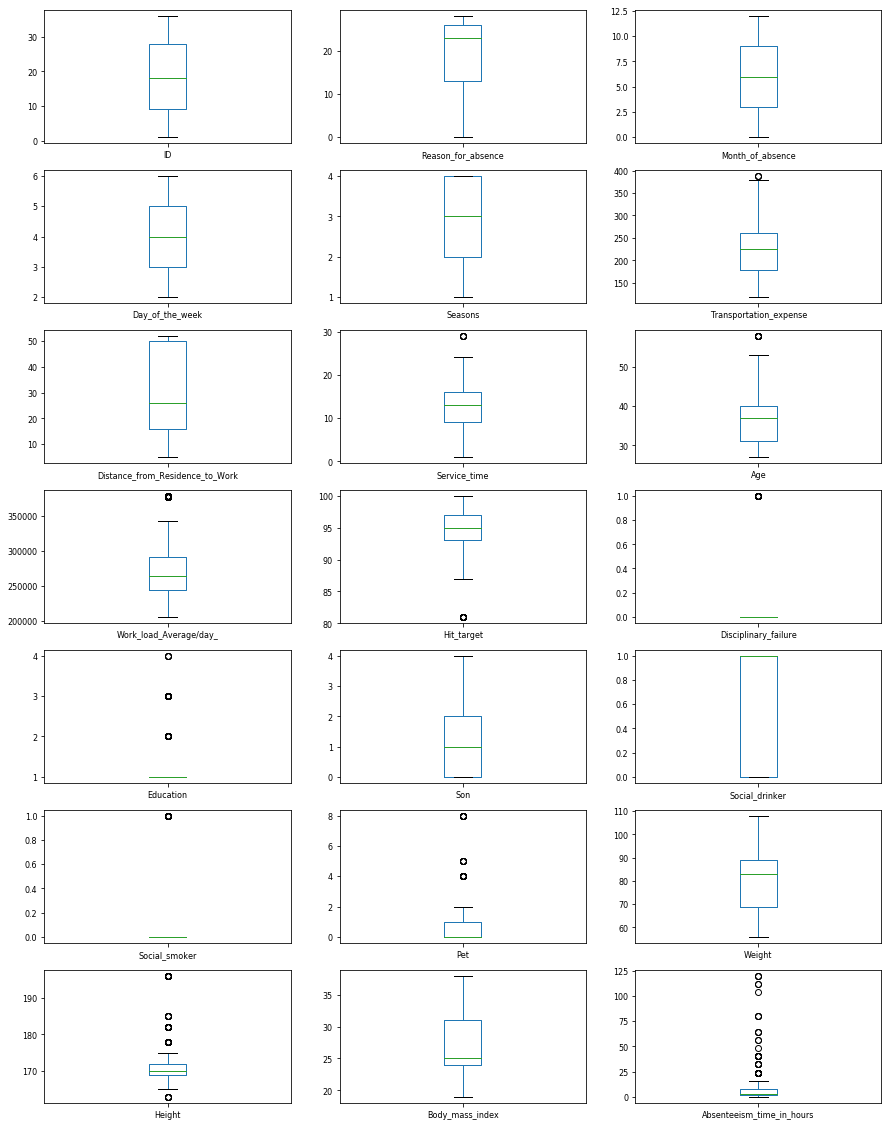

In [32]:
data.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
pyplot.show()

In [33]:
from fancyimpute import KNN 
cnames =['Service_time', 'Age', 'Work_load_Average/day_', 'Transportation_expense',
       'Hit_target', 'Height', 'Absenteeism_time_in_hours']       

for i in cnames:
    
    q75, q25 = np.percentile(data[i], [75,25])       # Getting 75th and 25th Percentile
    iqr = q75 - q25                                  # Calculating Interquartile range
    
    lower_fence = q25 - (iqr*1.5)                    # upper fence
    upper_fence = q75 + (iqr*1.5)                    # Lower fence
    
    data.loc[data[i]< lower_fence,i] = np.nan        # Replacing the values with NA
    data.loc[data[i]> upper_fence,i] = np.nan


data = pd.DataFrame(KNN(k = 3).complete(data), columns = data.columns) # Imputing missing values with KNN
data.isnull().sum().sum()  # Checking if there is any missing value

ModuleNotFoundError: No module named 'fancyimpute'

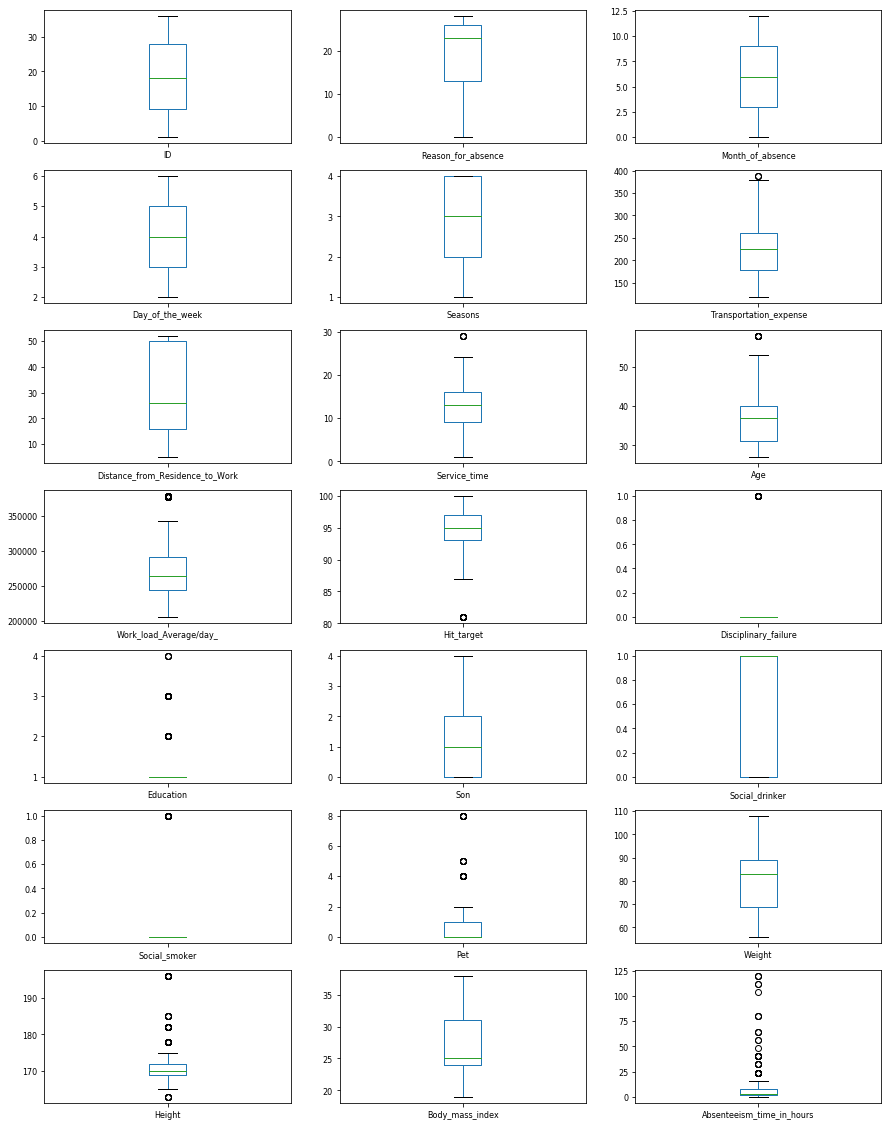

In [34]:
data.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
pyplot.show()

In [35]:
data.isnull().sum()

ID                                  0
Reason_for_absence                  3
Month_of_absence                    1
Day_of_the_week                     0
Seasons                             0
Transportation_expense              6
Distance_from_Residence_to_Work     3
Service_time                        3
Age                                 2
Work_load_Average/day_              8
Hit_target                          6
Disciplinary_failure                5
Education                          10
Son                                 6
Social_drinker                      3
Social_smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body_mass_index                    29
Absenteeism_time_in_hours           0
dtype: int64

In [36]:
data_loss = data.copy()

In [37]:
Seasons_dummies = pd.get_dummies(data.Seasons , drop_first=True , prefix = 'Seasons')
month_of_absence_dummies = pd.get_dummies(data.Month_of_absence , drop_first=True , prefix = 'Month_of_absence')
day_of_week_dummies = pd.get_dummies(data.Day_of_the_week , drop_first= True , prefix = 'Day_of_the_week')
Reason_for_absence_dummies = pd.get_dummies(data.Reason_for_absence , drop_first= True , prefix = 'Reason_for_absence')
ID_dummies = pd.get_dummies(data.ID , drop_first= True , prefix = 'ID')
Education_dummies = pd.get_dummies(data.Education , drop_first= True , prefix = 'Education')
Pet_dummies = pd.get_dummies(data.Pet , drop_first= True , prefix = 'Pet')
Son_dummies = pd.get_dummies(data.Pet , drop_first= True , prefix = 'Son')

In [38]:
data = pd.concat([data , Seasons_dummies], axis = 1)
data = pd.concat([data , month_of_absence_dummies], axis = 1)
data = pd.concat([data , day_of_week_dummies], axis = 1)
data = pd.concat([data , Reason_for_absence_dummies], axis = 1)
data = pd.concat([data , ID_dummies], axis = 1)
data = pd.concat([data ,Education_dummies ], axis = 1)
data = pd.concat([data ,Pet_dummies ], axis = 1)
data = pd.concat([data ,Son_dummies ], axis = 1)

In [39]:
data.drop('Seasons', axis=1, inplace=True)
data.drop('Month_of_absence', axis=1, inplace=True)
data.drop('Day_of_the_week', axis=1, inplace=True)
data.drop('Reason_for_absence', axis=1, inplace=True)
data.drop('ID', axis=1, inplace=True)
data.drop('Education', axis=1, inplace=True)
data.drop('Pet', axis=1, inplace=True)
data.drop('Son', axis=1, inplace=True)

In [40]:
data.shape

(718, 107)

In [41]:
X_train = data.loc[:,data.columns != 'Absenteeism_time_in_hours']
y_train = data['Absenteeism_time_in_hours']

In [42]:
for i in X_train.columns:
    X_train[i] = (X_train[i] - X_train[i].min())/ (X_train[i].max() - X_train[i].min())

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
X_train.head(5)

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Social_drinker,Social_smoker,Weight,Height,Body_mass_index,Seasons_2,Seasons_3,Seasons_4,Month_of_absence_1.0,Month_of_absence_2.0,Month_of_absence_3.0,Month_of_absence_4.0,Month_of_absence_5.0,Month_of_absence_6.0,Month_of_absence_7.0,Month_of_absence_8.0,Month_of_absence_9.0,Month_of_absence_10.0,Month_of_absence_11.0,Month_of_absence_12.0,Day_of_the_week_3,Day_of_the_week_4,Day_of_the_week_5,Day_of_the_week_6,Reason_for_absence_1.0,Reason_for_absence_2.0,Reason_for_absence_3.0,Reason_for_absence_4.0,Reason_for_absence_5.0,Reason_for_absence_6.0,Reason_for_absence_7.0,Reason_for_absence_8.0,Reason_for_absence_9.0,Reason_for_absence_10.0,Reason_for_absence_11.0,Reason_for_absence_12.0,Reason_for_absence_13.0,Reason_for_absence_14.0,Reason_for_absence_15.0,Reason_for_absence_16.0,Reason_for_absence_17.0,Reason_for_absence_18.0,Reason_for_absence_19.0,Reason_for_absence_21.0,Reason_for_absence_22.0,Reason_for_absence_23.0,Reason_for_absence_24.0,Reason_for_absence_25.0,Reason_for_absence_26.0,Reason_for_absence_27.0,Reason_for_absence_28.0,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13,ID_14,ID_15,ID_16,ID_17,ID_18,ID_19,ID_20,ID_21,ID_22,ID_23,ID_24,ID_25,ID_26,ID_27,ID_28,ID_29,ID_30,ID_31,ID_32,ID_33,ID_34,ID_35,ID_36,Education_2.0,Education_3.0,Education_4.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_1.0,Son_2.0,Son_4.0,Son_5.0,Son_8.0
0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,1.0,0.0,0.653846,0.272727,0.578947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,1.0,0.0,0.807692,0.454545,0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,1.0,0.0,0.634615,0.212121,0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,1.0,1.0,0.230769,0.151515,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,1.0,0.0,0.653846,0.272727,0.578947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
X_train.shape

(718, 106)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
y_Pca = pca.fit_transform(X_train)

ModuleNotFoundError: No module named 'sklearn.base'

In [46]:
plt.scatter(y_Pca[:, 0], y_Pca[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('winter', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.gcf().set_size_inches((17, 8)) 
plt.colorbar();

NameError: name 'y_Pca' is not defined

In [47]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  12


In [48]:
X_train.drop(labels=corr_features, axis=1, inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=102)
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()

ModuleNotFoundError: No module named 'sklearn.decomposition.base'

In [50]:
pca = PCA(n_components=45)
X = pca.fit(X_train).transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2)

NameError: name 'PCA' is not defined

In [51]:
X_train.shape

(718, 94)

In [52]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [54]:
from sklearn.neighbors import KNeighborsRegressor
def train_KNN(n_neigh):
    knn = KNeighborsRegressor(n_neighbors= n_neigh)
    knn_model = knn.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print('n_neighbours : {}  ----KNN rmse: {}'.format(n_neigh,(sqrt(mean_squared_error(y_test,y_pred)))))

In [55]:
for n_neigh in [3,5,7,10,15,20,25,30]:
    train_KNN(n_neigh)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [56]:
KNN_model = KNeighborsRegressor(n_neighbors= 7).fit(X_train , y_train)
KNN_pred_train = KNN_model.predict(X_train)
KNN_pred= KNN_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [57]:
print("Train Data")
print('n_neighbours : {}  ----KNN rmse: {}'.format(n_neigh,  (sqrt(mean_squared_error(y_train,KNN_pred_train)))))
print("Test Data")
print('n_neighbours : {}  ----KNN rmse: {}'.format(n_neigh,  (sqrt(mean_squared_error(y_test,KNN_pred)))))

Train Data


NameError: name 'KNN_pred_train' is not defined

In [58]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols_model = ols.fit(X_train, y_train)
y_pred_train = ols_model.predict(X_train)
y_pred = ols_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [59]:
print("Train Data")
print('Ordinary Least Squares rmse: {}'.format(sqrt(mean_squared_error(y_train,y_pred_train))))
print("Test Data")
print('Ordinary Least Squares rmse: {}'.format(sqrt(mean_squared_error(y_test,y_pred))))

Train Data


NameError: name 'y_pred_train' is not defined

In [60]:
from sklearn.linear_model import Ridge
def train_ridge(alpha):
    ridge = Ridge(alpha= alpha)
    ridge_model = ridge.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    print('alpha : {}  ----Ridge rmse: {}'.format(alpha, (sqrt(mean_squared_error(y_test,y_pred)))))

In [61]:
for alpha in [0.1,0.5, 1.0,3.0,7.0,10.0]:
    train_ridge(alpha)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
ridge_model = Ridge(alpha= 1.0).fit(X_train , y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred= ridge_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [63]:
print("Train Data")
print('Ridge rmse: {}'.format(sqrt(mean_squared_error(y_train,ridge_pred_train))))
print("Test Data")
print('Ridge rmse: {}'.format(sqrt(mean_squared_error(y_test,ridge_pred))))

Train Data


NameError: name 'ridge_pred_train' is not defined

In [64]:
from sklearn.linear_model import Lasso
def train_lasso(alpha):
    lasso = Lasso(alpha= alpha)
    lasso_model = lasso.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    print('alpha : {}  ---- Lasso rmse: {}'.format(alpha,(sqrt(mean_squared_error(y_test,y_pred)))))

In [65]:
for alpha in [0.1,0.5, 1.0,3.0,7.0,10.0]:
    train_lasso(alpha)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [66]:
lasso_model = Lasso(alpha= 0.1).fit(X_train , y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred= lasso_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [67]:
print("Train Data")
print('Lasso rmse: {}'.format(sqrt(mean_squared_error(y_train,lasso_pred_train))))
print("Test Data")
print('Lasso rmse: {}'.format(sqrt(mean_squared_error(y_test,lasso_pred))))

Train Data


NameError: name 'lasso_pred_train' is not defined

In [68]:
from sklearn.svm import SVR
def train_SVR(C, gamma):
    svr = SVR(C= C, gamma = gamma)
    svr_model = svr.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)
    print('C : {} , gamma : {} ----SVR rmse: {}'.format(C, gamma ,(sqrt(mean_squared_error(y_test,y_pred)))))

In [69]:
for C in [1, 10, 100,1000]:
    for gamma in [0.001, 0.0001]:
        train_SVR(C, gamma)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [70]:
svr_model = SVR(C= 1000, gamma = 0.001).fit(X_train , y_train)
svr_pred_train = svr_model.predict(X_train)
svr_pred= svr_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [71]:
print("Train Data")
print('Support Vector Regression rmse: {}'.format(sqrt(mean_squared_error(y_train,svr_pred_train))))
print("Test Data")
print('Support Vector Regression rmse: {}'.format(sqrt(mean_squared_error(y_test,svr_pred))))

Train Data


NameError: name 'svr_pred_train' is not defined

In [72]:
from sklearn import tree
def DT(depth):
    dt = tree.DecisionTreeRegressor( max_depth = depth)
    dt_model = dt.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print('depth : {} ----  Decision Tree rmse: {}'.format(depth,(sqrt(mean_squared_error(y_test,y_pred)))))
    

In [73]:
for depth in [1,2,5,10,20,None]:
    DT(depth)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [74]:
dt_model = tree.DecisionTreeRegressor(max_depth =2).fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred= dt_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [75]:
print("Train Data")
print('Decision Tree rmse: {}'.format(sqrt(mean_squared_error(y_train,dt_pred_train))))
print("Test Data")
print('Decision Tree rmse: {}'.format(sqrt(mean_squared_error(y_test,dt_pred))))

Train Data


NameError: name 'dt_pred_train' is not defined

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
def GBR(depth, learning_rate):
    gbr = GradientBoostingRegressor( max_depth = depth, learning_rate =learning_rate)
    gbr_model = gbr.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print('depth : {}, learning_rate{}  ---- Gradient Boosting Regression rmse: {}'.format(depth, learning_rate, (sqrt(mean_squared_error(y_test,y_pred)))))  
    

In [77]:
for depth in [1,2,5,None]:
    for learning_rate in [0.001,0.01,0.1]:
        GBR(depth, learning_rate)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [78]:
gbr_model = GradientBoostingRegressor(max_depth= 5,learning_rate = 0.001).fit(X_train , y_train)
gbr_pred_train = gbr_model.predict(X_train)
gbr_pred= gbr_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [79]:
print("Train Data")
print('GBDT rmse: {}'.format(sqrt(mean_squared_error(y_train,dt_pred_train))))
print("Test Data")
print('GBDT rmse: {}'.format(sqrt(mean_squared_error(y_test,dt_pred))))

Train Data


NameError: name 'dt_pred_train' is not defined

In [80]:
from sklearn.ensemble import RandomForestRegressor
def train_RF(n_est, depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    print('depth : {}, n_estimators : {}  ---- Random Forest Regression rmse: {}'.format(depth, n_est, (sqrt(mean_squared_error(y_test,y_pred)))))  


In [81]:
for n_est in [100, 200, 500, 1000, 2000]:
    for depth in [2, 5, 10 , 20, 30]:
        train_RF(n_est, depth)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [82]:
rf_model = RandomForestRegressor(max_depth= 30, n_estimators = 200).fit(X_train , y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred= rf_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [83]:
print("Train Data")
print('Random Forest rmse: {}'.format(sqrt(mean_squared_error(y_train,rf_pred_train))))
print("Test Data")
print('Random Forest rmse: {}'.format(sqrt(mean_squared_error(y_test,rf_pred))))

Train Data


NameError: name 'rf_pred_train' is not defined

In [84]:
df = pd.DataFrame({"rmse":[2.75,2.74,2.66,3.14,2.65,3.19,3.19,2.58],\
                   "Model" : ['KNN Regression' ,'Ordinary Least Square','Ridge Regression',\
                             'Lasso Regression' , 'Support Vector Regression','Decision Trees', "GBDT", "Random Forest"]})
print(df)

   rmse                      Model
0  2.75             KNN Regression
1  2.74      Ordinary Least Square
2  2.66           Ridge Regression
3  3.14           Lasso Regression
4  2.65  Support Vector Regression
5  3.19             Decision Trees
6  3.19                       GBDT
7  2.58              Random Forest


In [85]:
Loss_df = data_loss[['Month_of_absence','Service_time','Work_load_Average/day_','Absenteeism_time_in_hours']]

Loss_df['Loss'] = (Loss_df['Work_load_Average/day_'] * Loss_df['Absenteeism_time_in_hours']) / Loss_df['Service_time']
Loss_df["Loss"] = np.round(Loss_df["Loss"]).astype('int64')


No_absent = Loss_df[Loss_df['Month_of_absence'] == 0]['Loss'].sum()
January = Loss_df[Loss_df['Month_of_absence'] == 1]['Loss'].sum()
February = Loss_df[Loss_df['Month_of_absence'] == 2]['Loss'].sum()
March = Loss_df[Loss_df['Month_of_absence'] == 3]['Loss'].sum()
April = Loss_df[Loss_df['Month_of_absence'] == 4]['Loss'].sum()
May = Loss_df[Loss_df['Month_of_absence'] == 5]['Loss'].sum()
June = Loss_df[Loss_df['Month_of_absence'] == 6]['Loss'].sum()
July = Loss_df[Loss_df['Month_of_absence'] == 7]['Loss'].sum()
August = Loss_df[Loss_df['Month_of_absence'] == 8]['Loss'].sum()
September = Loss_df[Loss_df['Month_of_absence'] == 9]['Loss'].sum()
October = Loss_df[Loss_df['Month_of_absence'] == 10]['Loss'].sum()
November = Loss_df[Loss_df['Month_of_absence'] == 11]['Loss'].sum()
December = Loss_df[Loss_df['Month_of_absence'] == 12]['Loss'].sum()

data_Loss = {'No Absent': No_absent, 'Janaury': January,'Febraury': February,'March': March,
       'April': April, 'May': May,'June': June,'July': July,
       'August': August,'September': September,'October': October,'November': November,
       'December': December}
WorkLoss = pd.DataFrame.from_dict(data_Loss, orient='index')
WorkLoss.rename(index=str, columns={0: "Work_Load_Loss/Month"})


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Cannot convert non-finite values (NA or inf) to integer